# NASTRAN - Case Study 1.0 (SOL 101 Cantilever Beam)

The graph from `Lecture_1.pdf` (Slide 89/116) is built hereafter with a pyNastran usage to recover data and then matplotlib.

## 1. Classical Stuff

In [1]:
import numpy as np
import pandas as pd
pd.set_option('precision',1)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pyNastran.op2.op2 import OP2

## 2. pyNastran Section 

In [2]:
op2=OP2()
op2.read_op2('SOL101_Case_Study_1.op2',build_dataframe=True)

DEBUG:     fname=op2.py                    lineNo=365    combine=True
DEBUG:     fname=op2.py                    lineNo=366    -------- reading op2 with read_mode=1 --------
INFO:      fname=op2_scalar.py             lineNo=1175   op2_filename = 'SOL101_Case_Study_1.op2'
DEBUG:     fname=op2_scalar.py             lineNo=1363     table_name='GEOM1'
DEBUG:     fname=op2_scalar.py             lineNo=1363     table_name='GEOM2'
DEBUG:     fname=op2_scalar.py             lineNo=1363     table_name='GEOM3'
DEBUG:     fname=op2_scalar.py             lineNo=1363     table_name='GEOM4'
DEBUG:     fname=op2_scalar.py             lineNo=1363     table_name='EPT'
DEBUG:     fname=op2_scalar.py             lineNo=1363     table_name='MPTS'
DEBUG:     fname=op2_scalar.py             lineNo=1363     table_name='OQG1'
DEBUG:     fname=op2_scalar.py             lineNo=1363     table_name='OQMG1'
DEBUG:     fname=op2_scalar.py             lineNo=1363     table_name='OUGV1'
DEBUG:     fname=op2_scalar.py

In [3]:
print(op2.get_op2_stats())

displacements[1000]
  isubcase = 1000
  type=RealDisplacementArray nnodes=9
  data: [t1, t2, t3, r1, r2, r3] shape=[1, 9, 6] dtype=float32
  gridTypes
  sort1
  lsdvmns = [1000]

spc_forces[1000]
  isubcase = 1000
  type=RealSPCForcesArray nnodes=9
  data: [t1, t2, t3, r1, r2, r3] shape=[1, 9, 6] dtype=float32
  gridTypes
  sort1
  lsdvmns = [1000]

mpc_forces[1000]
  isubcase = 1000
  type=RealMPCForcesArray nnodes=9
  data: [t1, t2, t3, r1, r2, r3] shape=[1, 9, 6] dtype=float32
  gridTypes
  sort1
  lsdvmns = [1000]

grid_point_forces[1000]
  type=RealGridPointForcesArray nelements=1 total=27
  data: [1, ntotal, 6] where 6=[f1, f2, f3, m1, m2, m3]
  data.shape=(1L, 27L, 6L)
  element type: *TOTALS*, APP-LOAD, BEAM, F-OF-SPC
  sort1
  lsdvmns = [0]

load_vectors[1000]
  isubcase = 1000
  type=RealLoadVectorArray nnodes=9
  data: [t1, t2, t3, r1, r2, r3] shape=[1, 9, 6] dtype=float32
  gridTypes
  sort1
  lsdvmns = [1000]

cbeam_stress[1000]
  type=RealBeamStressArray nelements=8 nnode

## 3. Data wrangling  ¯\\\_(ツ)\_/¯

In [4]:
# The Cantilever Beam mesh written as a numpy array
x=np.linspace(0., 2000.0, num=9)
# The vertical displacement v read from the op2 (pyNastran object)
v=np.array([0])
for i in range(1,9):
    v=np.append(v,op2.displacements[1000].data_frame.loc[i][3])

## 4. Simple Matplotlib Visualization

E:\Program\Anaconda2\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


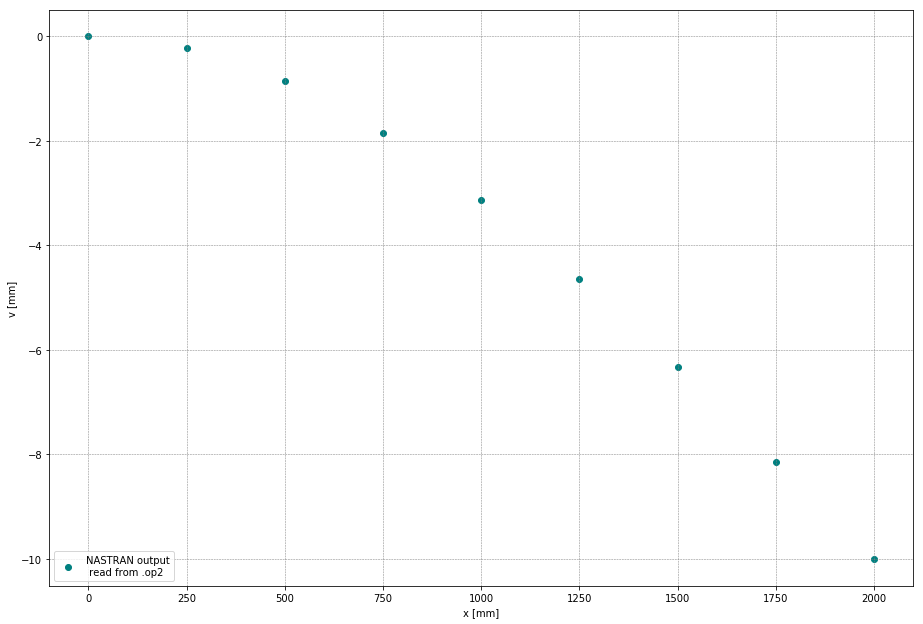

In [5]:
fig = plt.figure()
ax = fig.add_axes((0.2, 0.2, 2., 2.))
ax.grid(color='grey', linestyle='--', linewidth=0.5)
ax.scatter(x,v,color=['teal'],marker='o', label='NASTRAN output\n read from .op2')
ax.set_xlabel ('x [mm]')
ax.set_ylabel ('v [mm]')
plt.legend(loc=3)
fig.show()

# The end of the notebook.